In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

First we will explore the data, we will do this by loading in our data to pandas. We will look at the structure of the data, for example, the data type of each column. Follwing this will be cleaning the data i.e. removing null rows or columns which are uneeded. Above are the main libraries we shall use to do this. 

In [2]:
#reading in our training data
train = pd.read_csv("uc_data_train.csv") 
train.head(5) #diplaying the top 5 rows

,Unnamed: 0,customer_id,size_womenswear,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method
0,1,1,16,28,0.12,1,C,7,16,7,4964,Brand 1,47,Country Living,offline
1,2,2,20,118,0.61,2,H,3,20,6,5578,other,73,Aspiring Homemakers,online
2,3,3,8,125,0.04,2,F,3,12,4,4112,other,65,Suburban Stability,online
3,4,4,12,109,0.42,1,F,5,12,7,4261,Brand 1,69,Suburban Stability,offline
4,5,5,16,37,0.26,1,I,4,16,6,2432,other,62,Family Basics,offline


In [3]:
#checking datatypes
train.dtypes

Unnamed: 0                  int64
customer_id                 int64
size_womenswear             int64
total_number_of_orders      int64
return_rate               float64
first_order_channel         int64
socioeconomic_status       object
size_corsetry_cup           int64
size_corsetry_briefs        int64
size_footware               int64
days_since_first_order      int64
brand                      object
age_in_years                int64
socioeconomic_desc         object
order_method               object
dtype: object

at this point we will only drop the customer_id column and try to learn what we can from the dataset.

In [4]:
train = train.drop('customer_id', axis = 1)

Next we will look for any duplicate rows in our dataset and remove these rows. 

In [5]:
print(train.shape) #checking number of rows and columns in the dataset
duplicate_rows_df = train[train.duplicated()] 
print('number of duplicate rows:', duplicate_rows_df.shape) #checking for duplicate rows and outputting them

(80001, 14)
number of duplicate rows: (0, 14)


We can see that there are no duplicates rows to be removed in our data, the next check is to check for null  values in our data, these rows, if any, will also be removed from the data. 

In [6]:
print(train.isnull().sum()) #print number of null values in each column

Unnamed: 0                0
size_womenswear           0
total_number_of_orders    0
return_rate               0
first_order_channel       0
socioeconomic_status      0
size_corsetry_cup         0
size_corsetry_briefs      0
size_footware             0
days_since_first_order    0
brand                     0
age_in_years              0
socioeconomic_desc        0
order_method              0
dtype: int64


there are no null values in any of our data, we will proceed to analysis, first I want to check the most common sizes in our dataset.

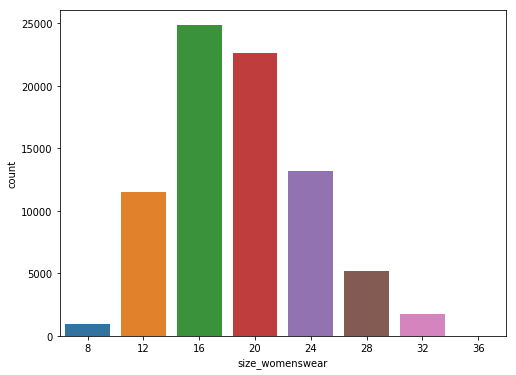

In [7]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x =train["size_womenswear"])
plt.show()

In [8]:
train['size_womenswear'].value_counts()

16    24825
20    22604
24    13211
12    11476
28     5196
32     1758
8       920
36       11
Name: size_womenswear, dtype: int64

we can clerarly see that the most common sizes bought are, by some distance, size 16 and size 20, this gives some insight into what sizes customers are most likely to buy. Another key insight is the customer age demographic, we can generate insights into this by a distribution plot

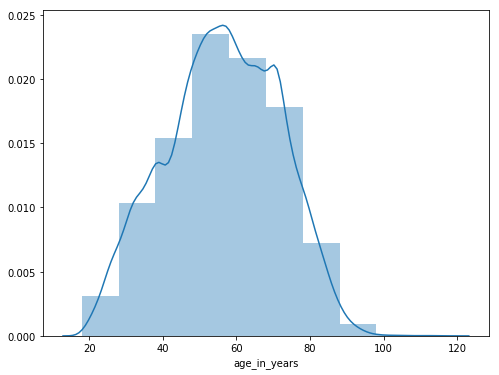

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(train["age_in_years"], bins = 10)
plt.show()

from our distibution we can see that the most common age group is 50-60 year olds. Followed closely by 60-70 yr olds. 

we can also find out on which platoform our customers are most likely to purchase their items

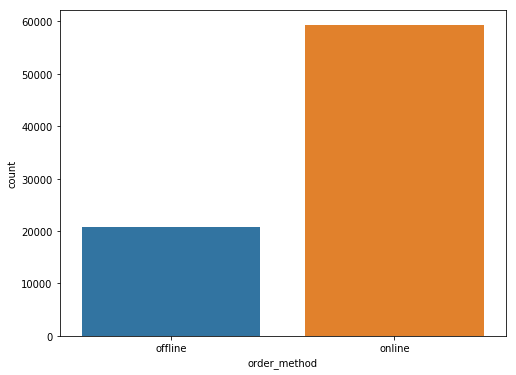

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x =train["order_method"])
plt.show()

we can clearly see that customers are significantly more likely to purchase online as opposed to offline. the final insight before we start looking at relationships between variables is socioecnomic status, which shows us which socioecnomic group is most likely to purchase clothing. 

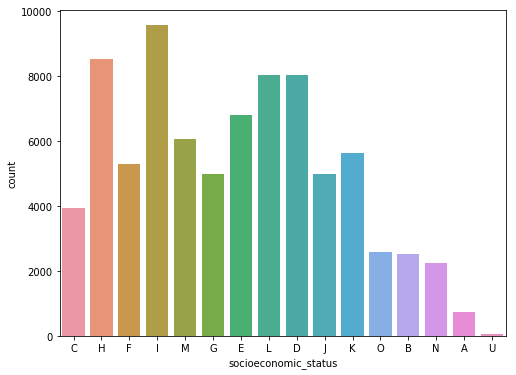

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x =train["socioeconomic_status"])
plt.show()


In [12]:
dictionary = {}
for index, row in train.iterrows():
            dictionary[row['socioeconomic_status']] = [row['socioeconomic_desc']]
print(dictionary) #finding which letter represents what demogrpahic

{'C': ['Country Living'], 'H': ['Aspiring Homemakers'], 'F': ['Suburban Stability'], 'I': ['Family Basics'], 'M': ['Modest Traditions'], 'G': ['Domestic Success'], 'E': ['Senior Security'], 'L': ['Vintage Value'], 'D': ['Rural Reality'], 'J': ['Transient Renters'], 'K': ['Municipal Challenge'], 'O': ['Rental Hubs'], 'B': ['Prestige Positions'], 'N': ['Urban Cohesion'], 'A': ['City Prosperity'], 'U': ['Unclassified']}


We can see that the most likely demographics of purchasers are 'family basics' and 'aspiring homemakers'. 

since we have important variables represented as letters, we will tranform these into numbers and begin to find correlations in our data.

In [13]:
def condition(x):
    if x == 'C':
        return 1
    elif x == 'H':
        return 2 
    elif x == 'F':
        return 3 
    elif x == 'I':
        return 4 
    elif x == 'M':
        return 5 
    elif x == 'G':
        return 6 
    elif x == 'E':
        return 7
    elif x == 'L':
        return 8 
    elif x == 'J':
        return 9 
    elif x == 'D':
        return 10 
    elif x == 'K':
        return 11 
    elif x == 'O':
        return 12
    elif x == 'B':
        return 13
    elif x == 'N':
        return 14 
    elif x == 'A':
        return 15
    elif x == 'U':
        return 15
train['socioeconomic_num'] = train['socioeconomic_status'].apply(condition)  
train.head()

,Unnamed: 0,size_womenswear,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method,socioeconomic_num
0,1,16,28,0.12,1,C,7,16,7,4964,Brand 1,47,Country Living,offline,1
1,2,20,118,0.61,2,H,3,20,6,5578,other,73,Aspiring Homemakers,online,2
2,3,8,125,0.04,2,F,3,12,4,4112,other,65,Suburban Stability,online,3
3,4,12,109,0.42,1,F,5,12,7,4261,Brand 1,69,Suburban Stability,offline,3
4,5,16,37,0.26,1,I,4,16,6,2432,other,62,Family Basics,offline,4


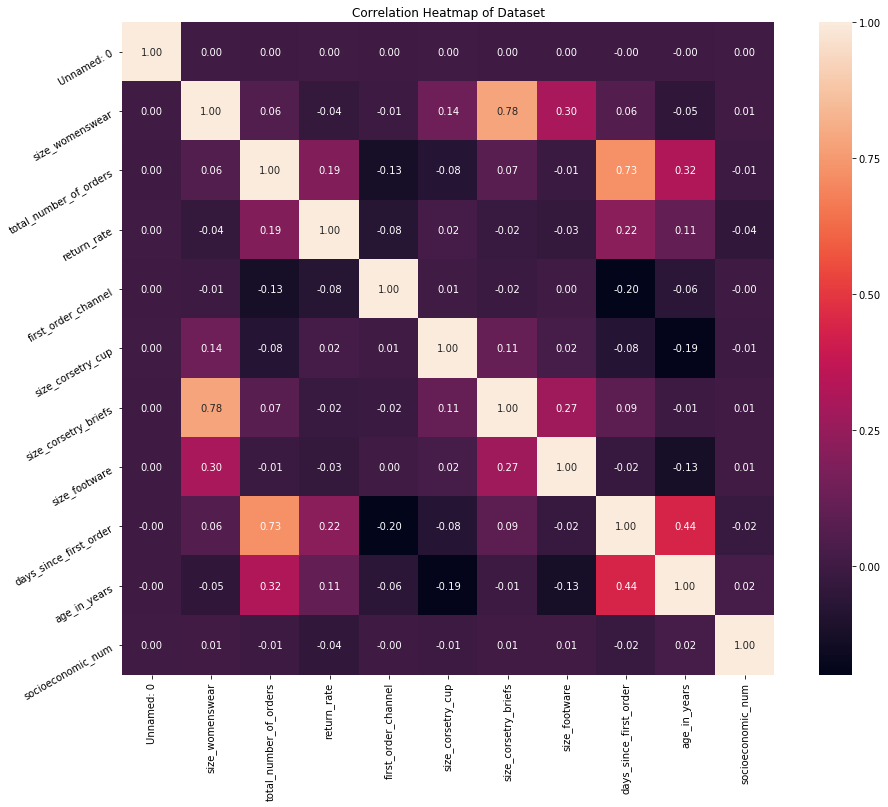

In [14]:
correlation = train.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
correlation['size_womenswear'].sort_values(ascending=False)

size_womenswear           1.000000
size_corsetry_briefs      0.782665
size_footware             0.297675
size_corsetry_cup         0.138198
days_since_first_order    0.061438
total_number_of_orders    0.057444
socioeconomic_num         0.006289
Unnamed: 0                0.002310
first_order_channel      -0.011909
return_rate              -0.035109
age_in_years             -0.048614
Name: size_womenswear, dtype: float64

From our corellation heatmap it is clear that the size of corsetry briefs has the best linear assocation with overall size. following this the size of footwear has the strongest correaltion at 0.30. So we can say that one rule in our dataset is that, genrally, larger corsetry sizes lead to larger womenswear sizes. Additonally we can see that days since last order has clear linear association with the total number of orders. Following this we wil start to look for outliers in our data which we need to remove to begin to develop our classification model. 

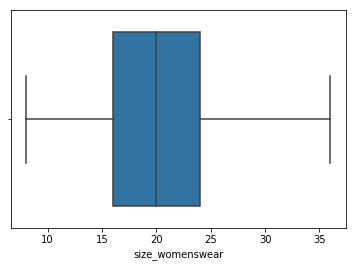

In [16]:
sns.boxplot(x=train['size_womenswear'])

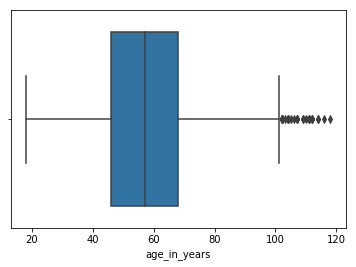

In [17]:
sns.boxplot(x=train['age_in_years'])

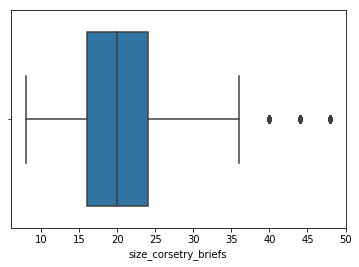

In [18]:
sns.boxplot(x=train['size_corsetry_briefs'])

In [19]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                40000.00
size_womenswear               8.00
total_number_of_orders       59.00
return_rate                   0.32
first_order_channel           1.00
size_corsetry_cup             2.00
size_corsetry_briefs          8.00
size_footware                 2.00
days_since_first_order     3135.00
age_in_years                 22.00
socioeconomic_num             6.00
dtype: float64


In [20]:
train = train[~((train < (Q1-1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(69973, 15)

In [21]:
print(train.isnull().sum()) 

Unnamed: 0                0
size_womenswear           0
total_number_of_orders    0
return_rate               0
first_order_channel       0
socioeconomic_status      0
size_corsetry_cup         0
size_corsetry_briefs      0
size_footware             0
days_since_first_order    0
brand                     0
age_in_years              0
socioeconomic_desc        0
order_method              0
socioeconomic_num         0
dtype: int64


Using box plots we can see that there are indeed outliers within our data, it is important to remove these outliers so they do not affect any models that we use since outliers are can be a major reason as to why a model is more inaccurate. The methods used here is the IQR score or the 'Interquartile Range' , box plots use this to display data. We, however, use this method to detect outliers and mathematically define a threshold outside of which data points can be considered outliers. using the formula defined in [19] we can find a numerical value for the IQR. following this in [20] this is applied to the dataframe, returning true and false values and removing outlier data. This process removed 11,000 data points in our dataset. We will now proceed to build some models to predict, the model looked at first will be a linear svm classfication due to its effectiveness in high dimensions and its ability to be used on multi class datasets (in our case this would be multiclass dress sizes)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #import models to prep data for the machine learning model

In [23]:
train.columns

Index(['Unnamed: 0', 'size_womenswear', 'total_number_of_orders',
       'return_rate', 'first_order_channel', 'socioeconomic_status',
       'size_corsetry_cup', 'size_corsetry_briefs', 'size_footware',
       'days_since_first_order', 'brand', 'age_in_years', 'socioeconomic_desc',
       'order_method', 'socioeconomic_num'],
      dtype='object')

In [24]:
train.head()

,Unnamed: 0,size_womenswear,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method,socioeconomic_num
0,1,16,28,0.12,1,C,7,16,7,4964,Brand 1,47,Country Living,offline,1
1,2,20,118,0.61,2,H,3,20,6,5578,other,73,Aspiring Homemakers,online,2
2,3,8,125,0.04,2,F,3,12,4,4112,other,65,Suburban Stability,online,3
3,4,12,109,0.42,1,F,5,12,7,4261,Brand 1,69,Suburban Stability,offline,3
4,5,16,37,0.26,1,I,4,16,6,2432,other,62,Family Basics,offline,4


In [25]:
train  = train.drop('Unnamed: 0', axis = 1)

In [26]:
train.head()

,size_womenswear,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method,socioeconomic_num
0,16,28,0.12,1,C,7,16,7,4964,Brand 1,47,Country Living,offline,1
1,20,118,0.61,2,H,3,20,6,5578,other,73,Aspiring Homemakers,online,2
2,8,125,0.04,2,F,3,12,4,4112,other,65,Suburban Stability,online,3
3,12,109,0.42,1,F,5,12,7,4261,Brand 1,69,Suburban Stability,offline,3
4,16,37,0.26,1,I,4,16,6,2432,other,62,Family Basics,offline,4


In [27]:
y = train['size_womenswear'].values #this is the target variable for the models

Here we select our target class, which in our case would be 'size_womenswear'

In [28]:
print(y)

[16 20  8 ... 16 20 16]


In [29]:
cols = ['total_number_of_orders',
       'return_rate', 'first_order_channel', 'size_corsetry_cup', 'size_corsetry_briefs', 'size_footware',
       'days_since_first_order', 'age_in_years', 'socioeconomic_num'] #predictor variables for our model 
x = train[cols].values


In [30]:
print(x)

[[2.800e+01 1.200e-01 1.000e+00 ... 4.964e+03 4.700e+01 1.000e+00]
 [1.180e+02 6.100e-01 2.000e+00 ... 5.578e+03 7.300e+01 2.000e+00]
 [1.250e+02 4.000e-02 2.000e+00 ... 4.112e+03 6.500e+01 3.000e+00]
 ...
 [6.100e+01 4.000e-02 2.000e+00 ... 3.127e+03 7.200e+01 2.000e+00]
 [3.600e+01 2.100e-01 2.000e+00 ... 3.144e+03 5.800e+01 4.000e+00]
 [1.700e+01 3.000e-02 1.000e+00 ... 1.581e+03 7.500e+01 5.000e+00]]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30) #splittling data into training and testing data
sc = StandardScaler() #transforming values into more appropriate values for out model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



we use a train test split of our training data to test the accuracy of the model, since the test values will be a known set of classifications, these known classes can be a base for testing the accuracy of our predicitons.

In [32]:
np.isnan(x_train)
np.isnan(x_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
from sklearn import svm
from sklearn import metrics
#Create a svm Classifier
clf = svm.SVC(kernel='linear',  class_weight = 'balanced') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(x_test)

#print(confusion_matrix(y_test,y_pred))
print("svm Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

svm Accuracy: 0.6385137549124688
[[ 106   35   12    4    5    0    2    0]
 [ 861  653  441   71   24   10   10    0]
 [ 191  182 3152  694   76   23   30   23]
 [  25   43  501 2871  473   44   34   34]
 [  11   13   67  377 1518  198   26   15]
 [   4    4   18   35  179  486   78   28]
 [   1    4    9   12   15   79  150   38]
 [   0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           8       0.09      0.65      0.16       164
          12       0.70      0.32      0.43      2070
          16       0.75      0.72      0.74      4371
          20       0.71      0.71      0.71      4025
          24       0.66      0.68      0.67      2225
          28       0.58      0.58      0.58       832
          32       0.45      0.49      0.47       308
          36       0.00      0.00      0.00         0

    accuracy                           0.64     13995
   macro avg       0.49      0.52      0.47     13995
weighted avg       0.69   

C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


we can see our model has a accuracy score around 65% for our svm, we will now see if we can make that better. to do this we will remove the variables which had near zero correlation with the target variable, we can deduce these in [14]. These variables do not tell us anything about a customers chosen womenswear size. We will create some new training and validation sets for our model after removing these columns. since we looking at multiclass classifications we are looking at a number of metrics these include the precision, the recall value and the F score. 

In [34]:
cols = ['size_corsetry_cup', 'size_corsetry_briefs', 'size_footware'
] #predictor variables after removing low correlation variables
X = train[cols].values
print(X)

[[ 7 16  7]
 [ 3 20  6]
 [ 3 12  4]
 ...
 [ 3 20  5]
 [ 4 20  5]
 [ 2 32  5]]


In [35]:
Y = train['size_womenswear'].values
print(Y)

[16 20  8 ... 16 20 16]


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) #splittling data into training and testing data
sc = StandardScaler() #transforming values into more appropriate values for out model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.84286153  0.18031253 -0.26587925]
 [-0.17367447  0.18031253 -0.26587925]
 [-0.17367447 -0.60591079 -0.26587925]
 ...
 [ 1.16469964 -0.60591079 -0.26587925]
 [-0.17367447 -0.60591079 -1.0006437 ]
 [-0.17367447  1.75275917  0.4688852 ]]


In [38]:
clf1 = svm.SVC(kernel='linear') # Linear Kernel we set vlass weight to balanced, this is a simple technique in scikit lean when working with in=mbalanced classes in data

#Train the model using the training sets
clf1.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred2 = clf1.predict(X_test)

#print(confusion_matrix(y_test,y_pred))
print("svm Accuracy:",metrics.accuracy_score(Y_test, y_pred2))
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_pred2))

print(classification_report(Y_test,y_pred2))

svm Accuracy: 0.6906752411575563
[[   0  134   16    5    1    1    2    0]
 [   0 1441  488   68   26   10    9    0]
 [   0  368 3256  710   78   30   24    0]
 [   0   81  497 2846  509   54   52    0]
 [   0   26   54  375 1526  199   24    0]
 [   0    9   20   45  177  501   62    0]
 [   0    3    6    5   11  148   96    0]
 [   0    0    0    0    0    1    1    0]]
              precision    recall  f1-score   support

           8       0.00      0.00      0.00       159
          12       0.70      0.71      0.70      2042
          16       0.75      0.73      0.74      4466
          20       0.70      0.70      0.70      4039
          24       0.66      0.69      0.67      2204
          28       0.53      0.62      0.57       814
          32       0.36      0.36      0.36       269
          36       0.00      0.00      0.00         2

    accuracy                           0.69     13995
   macro avg       0.46      0.48      0.47     13995
weighted avg       0.69   

C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
for i in y_pred2:
    print(i)

we can see that limiting the features increases the accuracy by around 6% the accuracy of our svm, another such algorithm for multiclass prediction is a KNN classifier below we will now attempt to tackle this with a knn classifer and a random forest classifier which can also be used to tackle multiclass problems. 

In [39]:
# Create decision tree classifer object
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Train model
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("RFC Accuracy:",metrics.accuracy_score(y_test, predict))
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print("RFC Accuracy:",metrics.accuracy_score(Y_test, predict))
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predict))

print(classification_report(Y_test,predict))


C:\Users\irffy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC Accuracy: 0.6531618435155413
RFC Accuracy: 0.6951768488745981
[[  27  107   17    7    1    0    0    0]
 [  12 1427  491   72   28    5    7    0]
 [   2  366 3264  714   80   19   20    1]
 [   3   79  506 2870  511   40   27    3]
 [   0   26   57  380 1529  187   25    0]
 [   0    9   26   49  180  450  100    0]
 [   0    3   13    9   13   69  162    0]
 [   0    0    0    1    0    0    1    0]]
              precision    recall  f1-score   support

           8       0.61      0.17      0.27       159
          12       0.71      0.70      0.70      2042
          16       0.75      0.73      0.74      4466
          20       0.70      0.71      0.71      4039
          24       0.65      0.69      0.67      2204
          28       0.58      0.55      0.57       814
          32       0.47      0.60      0.53       269
          36       0.00      0.00      0.00         2

    accuracy                           0.70     13995
   macro avg       0.56      0.52      0.52    

for both limited features and the full feature set we see the same results as our SVM in the KNN [40] and the random forest classifier. [39]

In [55]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("knn Accuracy:",metrics.accuracy_score(Y_test, y_pred))
from sklearn.metrics import classification_report,confusion_matrix


knn Accuracy: 0.4783851375491247
knn Accuracy: 0.5035369774919615
knn Accuracy: 0.5837084673097535
knn Accuracy: 0.6194355126831012
knn Accuracy: 0.6330117899249732
knn Accuracy: 0.622293676312969
knn Accuracy: 0.6705251875669882
knn Accuracy: 0.6745266166488031
knn Accuracy: 0.6652375848517328
knn Accuracy: 0.6681672025723473
knn Accuracy: 0.6679528403001072
knn Accuracy: 0.6672382993926402
knn Accuracy: 0.6745266166488031
knn Accuracy: 0.6745980707395498
knn Accuracy: 0.6784565916398714
knn Accuracy: 0.690961057520543
knn Accuracy: 0.6948195784208646
knn Accuracy: 0.6941050375133977
knn Accuracy: 0.6947481243301179
knn Accuracy: 0.6943193997856377
knn Accuracy: 0.6951768488745981
knn Accuracy: 0.6953197570560915
knn Accuracy: 0.6953912111468381
knn Accuracy: 0.6953197570560915
knn Accuracy: 0.6956055734190782
knn Accuracy: 0.6961057520543051
knn Accuracy: 0.6943908538763844
knn Accuracy: 0.6963915684172919
knn Accuracy: 0.6959628438728117


All of our classifiers get roughly a 70% accuracy when predicting, the model could be further optimised by reducing the imbalances in the classes, class U and A are disproptionately low when compared to the other classes another technique could be to use an ensemble classifier, however we currently do not have the neccassary computational power to do so. We will proceed to use the SVM to predcit the sizes in our test dataset. We will now process the test dataset

In [41]:
test = pd.read_csv('uc_data_test.csv')
test.head()

,Unnamed: 0,customer_id,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method
0,1,7,17,0.26,2,M,4,20,6,1602,Brand 3,43,Modest Traditions,online
1,2,8,30,0.52,2,L,4,16,8,1809,other,47,Vintage Value,online
2,3,9,9,0.31,2,I,9,16,6,179,Brand 3,60,Family Basics,online
3,4,13,109,0.08,2,M,3,16,7,4455,other,65,Modest Traditions,online
4,5,24,135,0.10,2,F,3,24,6,8752,other,70,Suburban Stability,online


In [42]:
test = test.drop(['Unnamed: 0', 'customer_id'], axis =1)


In [43]:
test.head()

,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method
0,17,0.26,2,M,4,20,6,1602,Brand 3,43,Modest Traditions,online
1,30,0.52,2,L,4,16,8,1809,other,47,Vintage Value,online
2,9,0.31,2,I,9,16,6,179,Brand 3,60,Family Basics,online
3,109,0.08,2,M,3,16,7,4455,other,65,Modest Traditions,online
4,135,0.10,2,F,3,24,6,8752,other,70,Suburban Stability,online


We also need to add the numerical socioeconomic status we added to our training dataframe.

In [44]:
test['socioeconomic_num'] = test['socioeconomic_status'].apply(condition)  
test.head()

,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method,socioeconomic_num
0,17,0.26,2,M,4,20,6,1602,Brand 3,43,Modest Traditions,online,5
1,30,0.52,2,L,4,16,8,1809,other,47,Vintage Value,online,8
2,9,0.31,2,I,9,16,6,179,Brand 3,60,Family Basics,online,4
3,109,0.08,2,M,3,16,7,4455,other,65,Modest Traditions,online,5
4,135,0.10,2,F,3,24,6,8752,other,70,Suburban Stability,online,3


In [45]:
#selecting our predictor variables
cols = ['size_corsetry_cup', 'size_corsetry_briefs', 'size_footware'
] #predictor variables after removing low correlation variables
Xtest = test[cols].values
print(Xtest)

[[ 4 20  6]
 [ 4 16  8]
 [ 9 16  6]
 ...
 [ 8 20  9]
 [ 6 16  5]
 [ 4 28  8]]


In [46]:
Xtest = sc.fit_transform(Xtest)
print(Xtest)

[[-0.20444796  0.12277853 -0.28676213]
 [-0.20444796 -0.62107115  1.083434  ]
 [ 2.85691377 -0.62107115 -0.28676213]
 ...
 [ 2.24464142  0.12277853  1.76853207]
 [ 1.02009673 -0.62107115 -0.9718602 ]
 [-0.20444796  1.61047787  1.083434  ]]


In [47]:
predictedoutput = clf1.predict(Xtest) #predciting the sizes for our customers in the test dataset

In [48]:
print(predictedoutput)

[20 16 16 ... 20 16 28]


In [56]:
column = predictedoutput.tolist()


In [52]:
test['size_predicitons'] = column

In [53]:
test.head()

,total_number_of_orders,return_rate,first_order_channel,socioeconomic_status,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,brand,age_in_years,socioeconomic_desc,order_method,socioeconomic_num,size_predicitons
0,17,0.26,2,M,4,20,6,1602,Brand 3,43,Modest Traditions,online,5,20
1,30,0.52,2,L,4,16,8,1809,other,47,Vintage Value,online,8,16
2,9,0.31,2,I,9,16,6,179,Brand 3,60,Family Basics,online,4,16
3,109,0.08,2,M,3,16,7,4455,other,65,Modest Traditions,online,5,16
4,135,0.10,2,F,3,24,6,8752,other,70,Suburban Stability,online,3,24


In [54]:
test.to_csv(r'uc_predcitons.csv')

Summary:

After first finding some simple insights in our data, i.e. age demogrphics we proceeded to begin to cleanse out data, this was primarily outlier detection since the data did not have any null values. Once this was completed we begin to train some models on the data, we identified our problem as a multiclass classifcation problem (dress sizes) the first model selected was the linear SVM (support vector machine) this is due to its effectiveness in this domain. Follwing our inital testing which led to a 63% accuracy in our model we decided to reduce the number of features in our model, we removed the features which had near zero correlation with the target variable. In the linear SVM this yielded a 6% increase in accuracy. Following this a number of other models were used which work well in multiclass problems. namely, these were random forest classification and the k nearest neighbour (knn) classifier to see if they yielded better results, this was not the case. SO we proceeded to use our inital SVM to create the final predcitons for our testing set.  